In [100]:
import numpy as np
from matplotlib import pyplot as plt

In [101]:
n = 5
g = 500
np.random.seed(1)

theta = np.random.uniform(size=n)*2*np.pi
np.sort(theta)
A = np.cos(theta)
B = np.sin(theta)
x = np.linspace(-2, 1.5, g)
y = np.linspace(-1.75, 1.75, g)
X, Y = np.meshgrid(x, y)
Z = X[:, :, np.newaxis]*A[np.newaxis, np.newaxis, :] + Y[:, :, np.newaxis]*B[np.newaxis, np.newaxis, :]

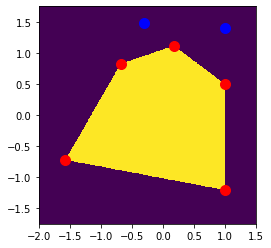

In [102]:
ax = plt.gca()
ax.set_aspect("equal")
ax.pcolormesh(X, Y, np.all(Z <= 1, axis=-1), shading="auto")
ax.set_xlim(-2, 1.5)
ax.set_ylim(-1.75, 1.75)

pairs = [[i, j] for i in range(n - 1) for j in range(i + 1, n)]
vertices = []
for I in pairs:
  U = np.array([A[I], B[I]]).T
  x, y = np.linalg.inv(U) @ np.array([1, 1])
  if np.alltrue(A*x + B*y < 1 + 1e-10):
    vertices.append((set(I), (x, y)))
    plt.plot(x, y, 'ro', ms=10)
  else:
    plt.plot(x, y, 'bo', ms=10)

plt.show()

In [111]:
V = np.array([v[1] for v in vertices]).T
I = np.isclose(U @ V, 1)

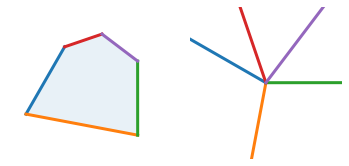

In [112]:
ax = plt.subplot(1, 2, 1)
ax.set_aspect("equal")
ax.set_xlim(-2, 1.5)
ax.set_ylim(-1.75, 1.75)
ax.set_axis_off()

J = np.argsort(np.arctan2(V[1], V[0]))
ax.fill(*V[:, J], alpha=0.1)

for i in I:
    ax.plot(*V[:, i], lw=3)

ax = plt.subplot(1, 2, 2)
t = 1.1
ax.set_xlim(-t, t)
ax.set_ylim(-t, t)
ax.set_aspect("equal")
ax.set_axis_off()
m = t*min([*np.abs(A), *np.abs(B)])
for a, b in zip(A, B):
    plt.plot([0, a/m], [0, b/m], lw=3)
